<a href="https://colab.research.google.com/github/reyshamarie/machine_learning/blob/main/machine_learning_for_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetic Prediction using Machine Learning**

**Objective**

 We will try to build a machine learning model to accurately predict whether  or not the patients in the dataset have diabetes

**Dataset details**




# **Step 1:Import libraries and Dataset**

In [ ]:
#packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#read the diabetes dataset
import pandas as pd
diabetes = pd.read_csv("/gdrive/My Drive/Colab Notebooks/assignment1/pima-indians-diabetes.csv")

# **Step 2: Data Reading**

In [ ]:
#preview the data
diabetes.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#data dimension

diabetes.shape

(768, 9)

In [ ]:
#features of data(data type)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#statistic summary
diabetes.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes['class'].value_counts()

,count
class,
0,500
1,268


In [ ]:
diabetes.groupby('class').mean()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# **Step 3: Data Cleaning**

1. Checking null values

In [ ]:
print(diabetes.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [ ]:
diabetes=diabetes.copy(deep = True)

diabetes[['preg','plas','pres','skin','test','mass']]=diabetes[['preg','plas','pres','skin','test','mass']].replace(0,np.nan)

print(diabetes.isnull().sum())

preg     111
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

def plot_missing_values_interactive(data):
    # Calculate the number of missing values per column
    missing_counts = data.isnull().sum()
    # Filter out columns with no missing values
    missing_counts = missing_counts[missing_counts > 0]

    # Calculate the percentage of missing values
    percentage_missing = (missing_counts / len(data) * 100).round(2)

    # Define a similar color scheme to "crest"
    crest_colors = ['#9B9EBC', '#6E6F8C', '#4C4E6A', '#2E2F45']

    # Create a bar trace with data labels
    trace = go.Bar(
        x=missing_counts.index,
        y=missing_counts.values,
        text=missing_counts.values,  # Data labels
        textposition='outside',      # Position of the text
        marker=dict(color=crest_colors[0], line=dict(color='#000000', width=1.5))
    )

    # Create layout
    layout = go.Layout(
        title='Missing Values per Column',
        xaxis=dict(title='Columns'),
        yaxis=dict(title='Number of Missing Values'),
        template='plotly_white'
    )

    # Create figure
    fig = go.Figure(data=[trace], layout=layout)

    # Show the plot
    pyo.iplot(fig)

# Example usage
plot_missing_values_interactive(diabetes)

Filling the Nan values --- To fill these Nan values the data distribution needs to be understood, for that we are taking the hist plot for the dataset

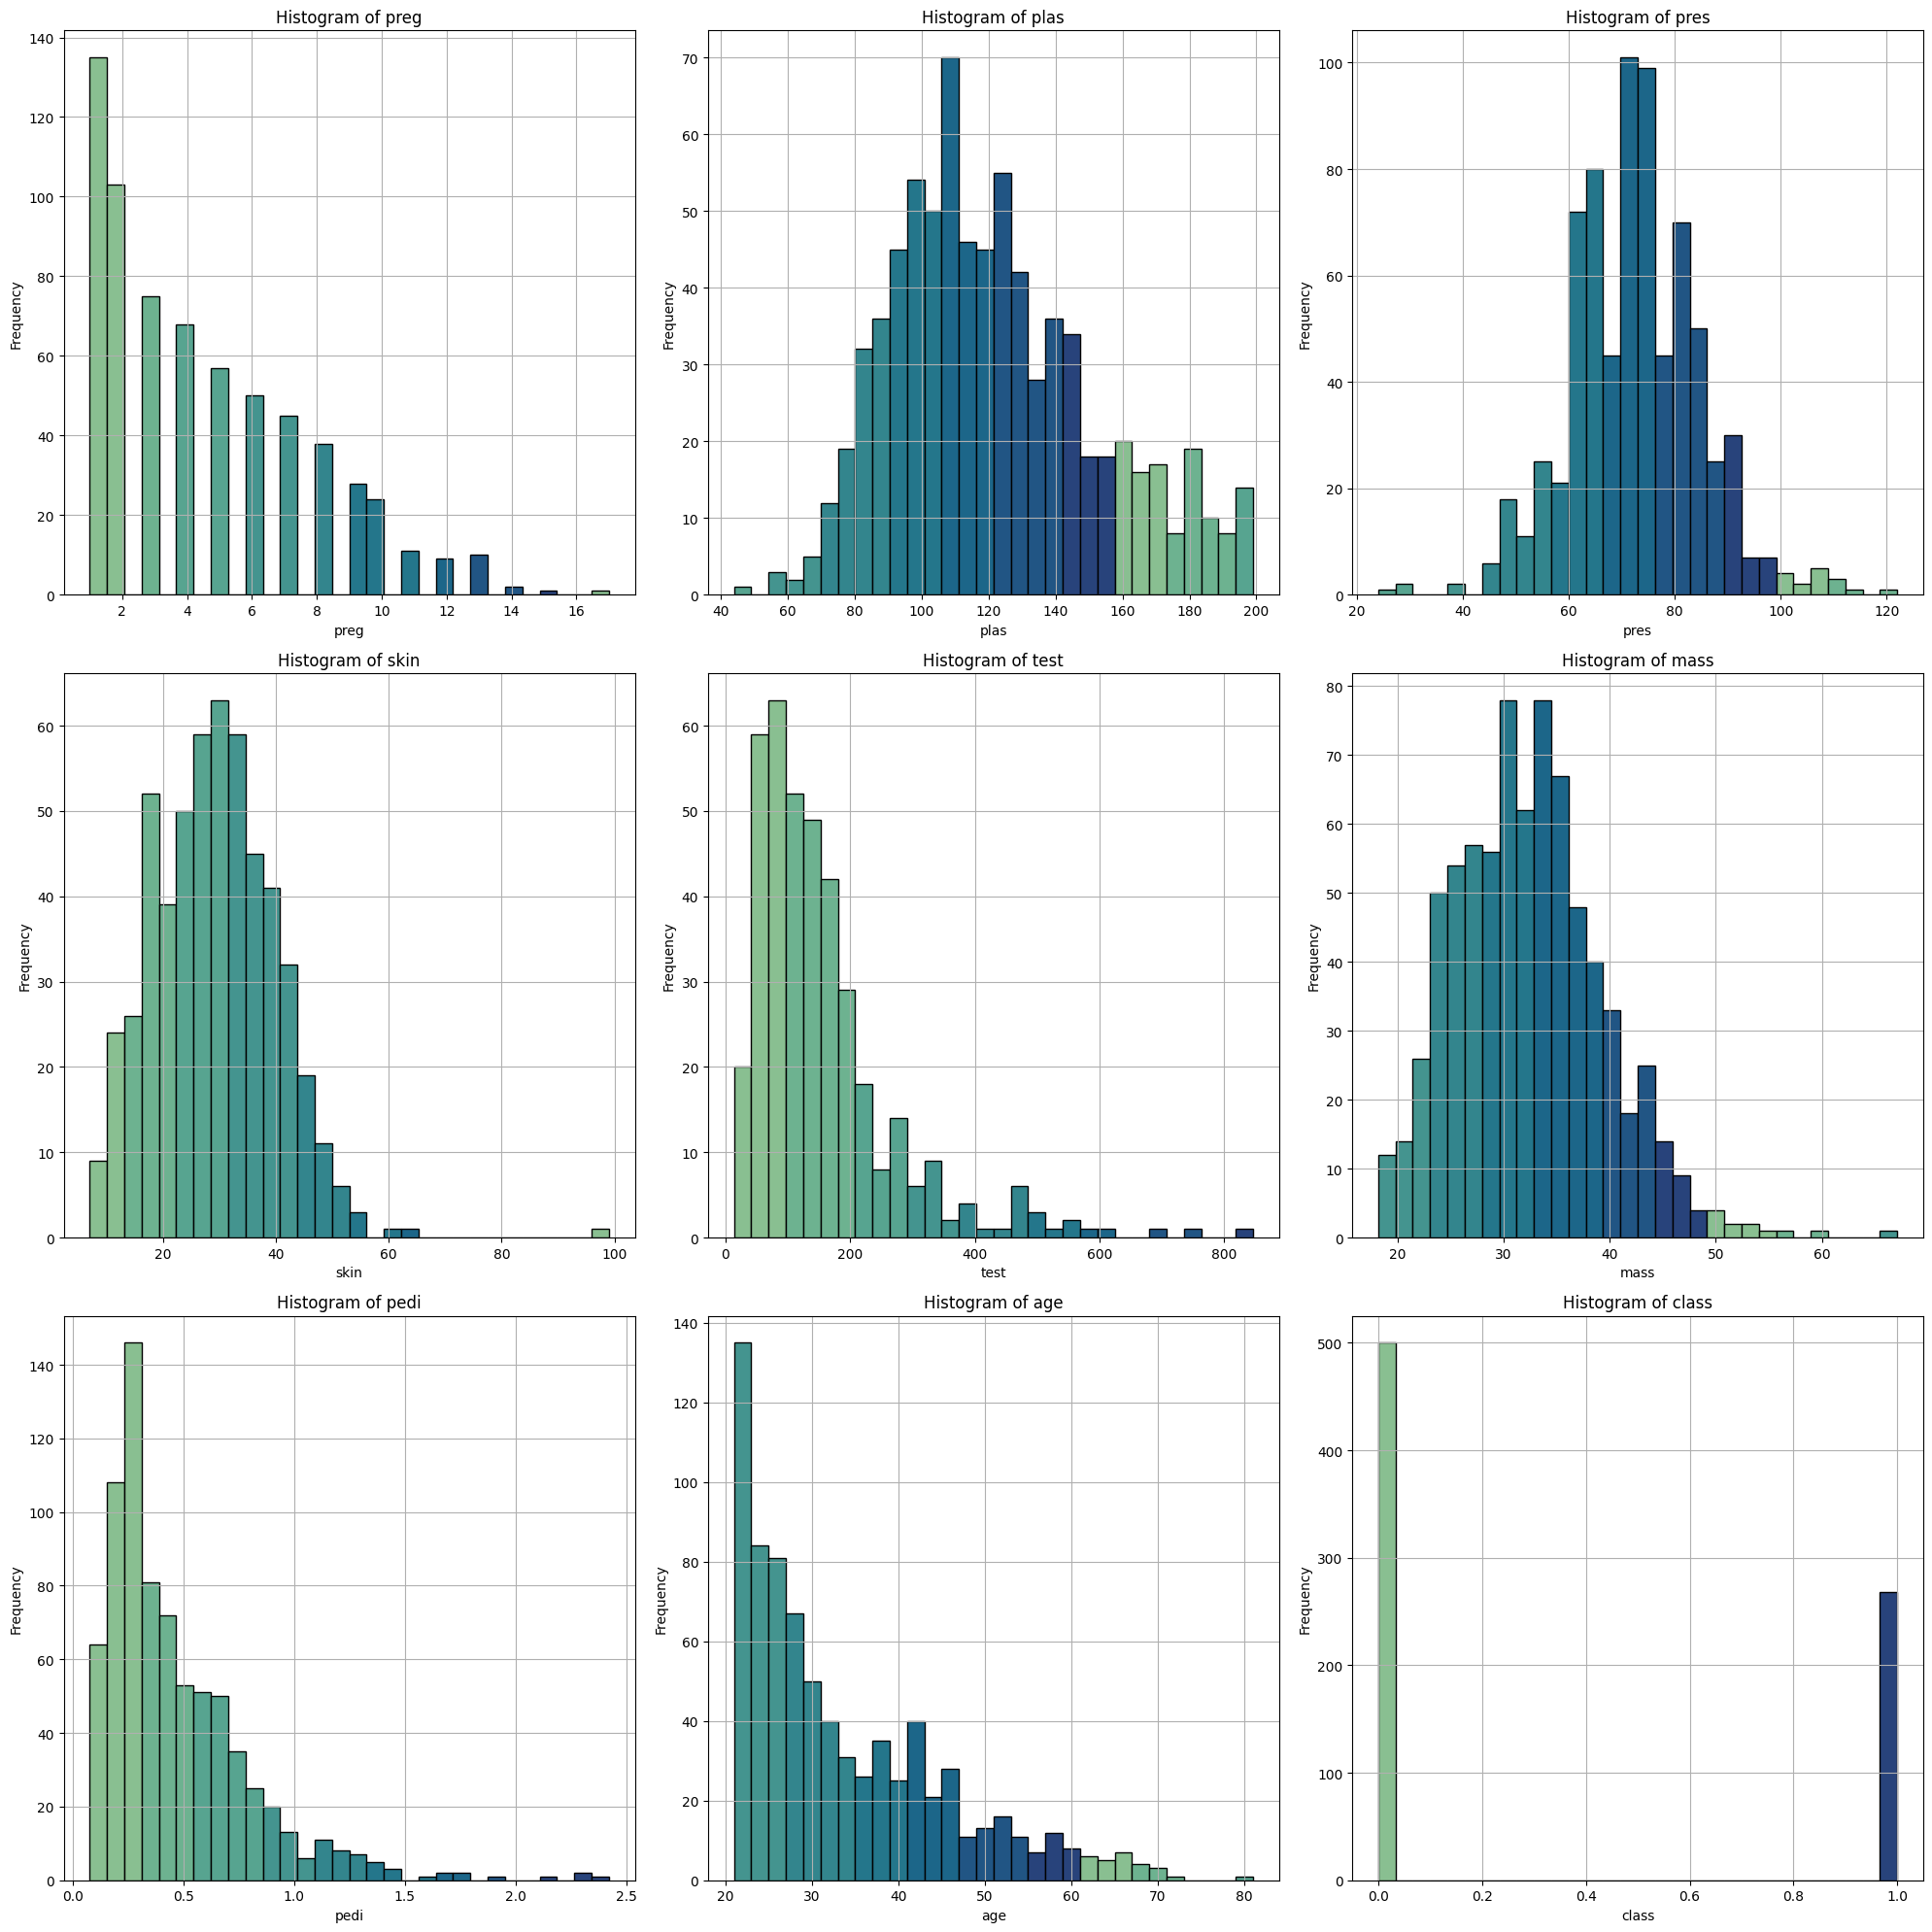

In [ ]:
# Define the color palette
palette = sns.color_palette("crest", len(diabetes.columns))

# Create histograms using DataFrame.hist()
p = diabetes.hist(figsize=(20, 20), bins=30, edgecolor='black')

# Iterate through each subplot and apply the color from the palette
for ax, column in zip(p.flatten(), diabetes.columns):
    # Set the color for the histogram bars
    for patch in ax.patches:
        # Calculate the color index based on the number of bins
        color_index = int(patch.get_x() / (patch.get_width() * len(ax.patches)) * len(palette))
        patch.set_facecolor(palette[color_index % len(palette)])

    # Set title and labels
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Left-Skewed (Negative Skew): Mean < Median, long left tail.
Right-Skewed (Positive Skew): Mean > Median, long right tail.


Impute nan values for the columns in accordance with their distribution




In [ ]:
diabetes['plas'].fillna(diabetes['plas'].mean(), inplace = True)
diabetes['pres'].fillna(diabetes['pres'].mean(), inplace = True)
diabetes['skin'].fillna(diabetes['skin'].median(), inplace = True)
diabetes['test'].fillna(diabetes['test'].median(), inplace = True)
diabetes['mass'].fillna(diabetes['mass'].median(), inplace = True)

In [ ]:
print(diabetes.isnull().sum())

preg     111
plas       0
pres       0
skin       0
test       0
mass       0
pedi       0
age        0
class      0
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has b

<Figure size 2000x25000 with 0 Axes>

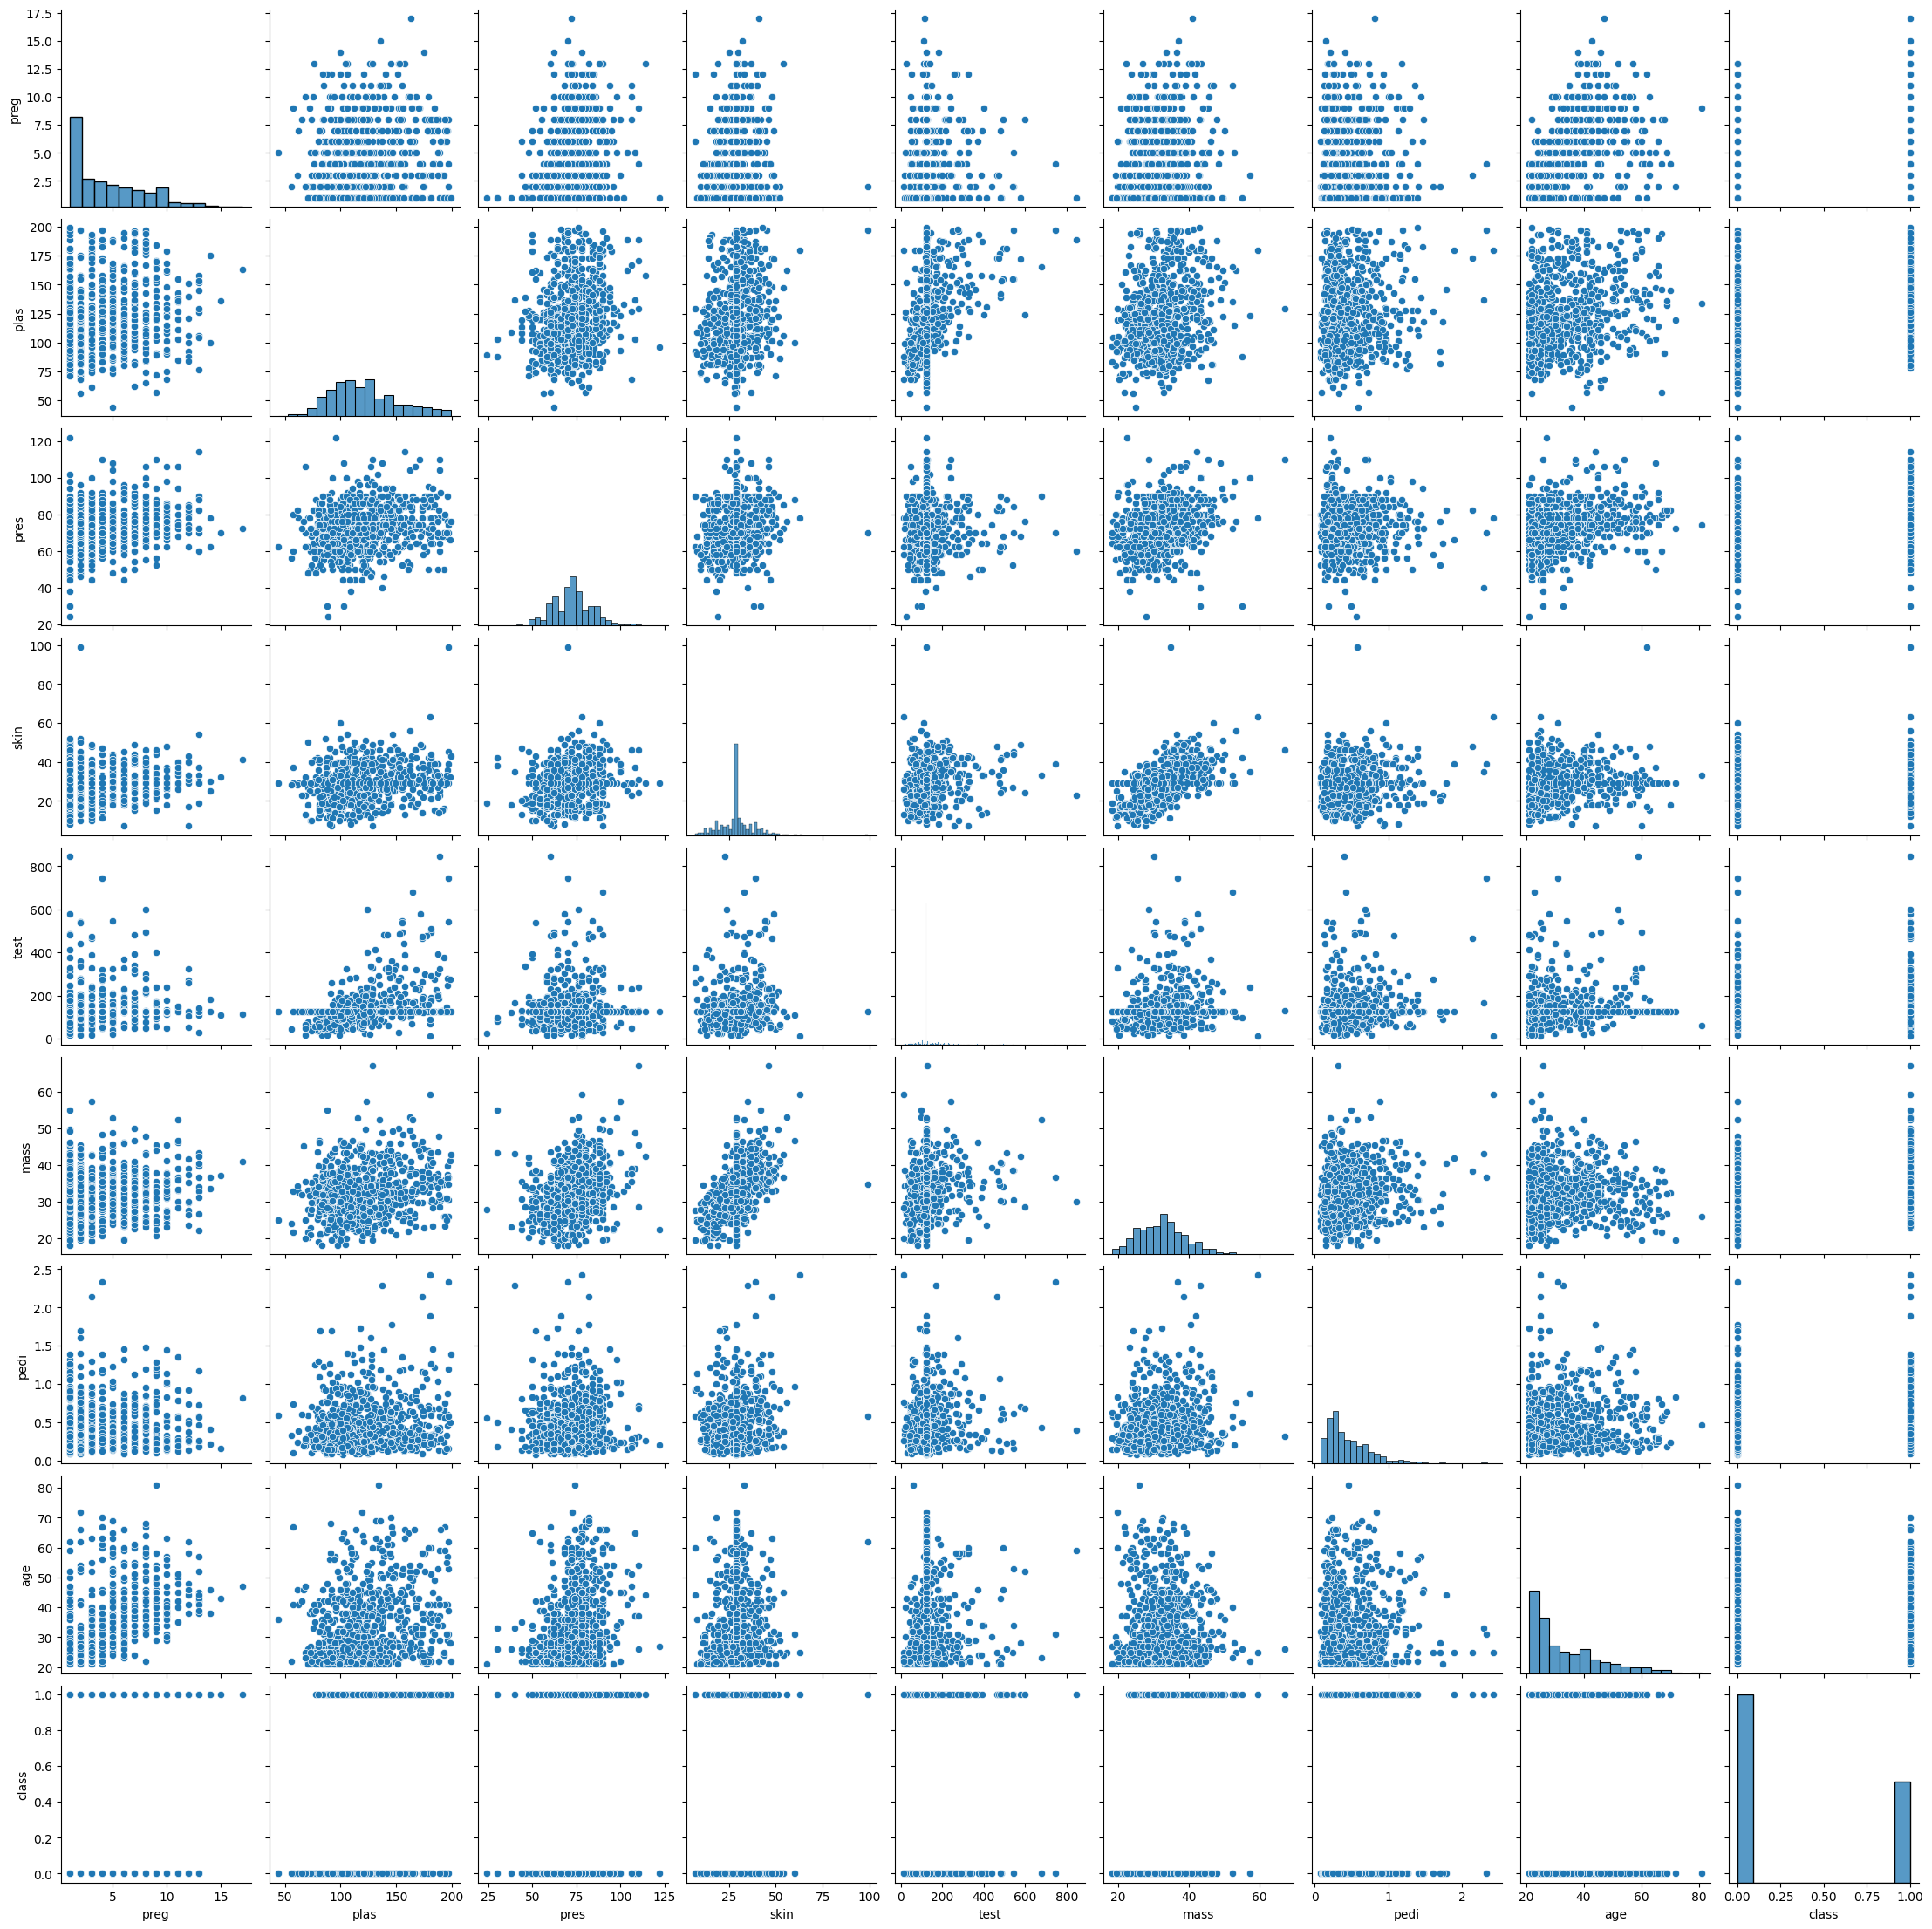

In [ ]:
#pairing plot uncleared

# Define the color palette
palette = sns.color_palette("crest", as_cmap=True)  # Creates a colormap object

# Create the scatter plot matrix
# Adjust the figure size
plt.figure(figsize=(20, 250))

# Create the scatter plot matrix with the BuGn color palette
# Note: Pairplot does not directly support colormaps, so use the palette for visual aesthetics
pairplot = sns.pairplot(diabetes, palette=palette)

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

/usr/local/lib/python3.10/di

<Figure size 2000x2000 with 0 Axes>

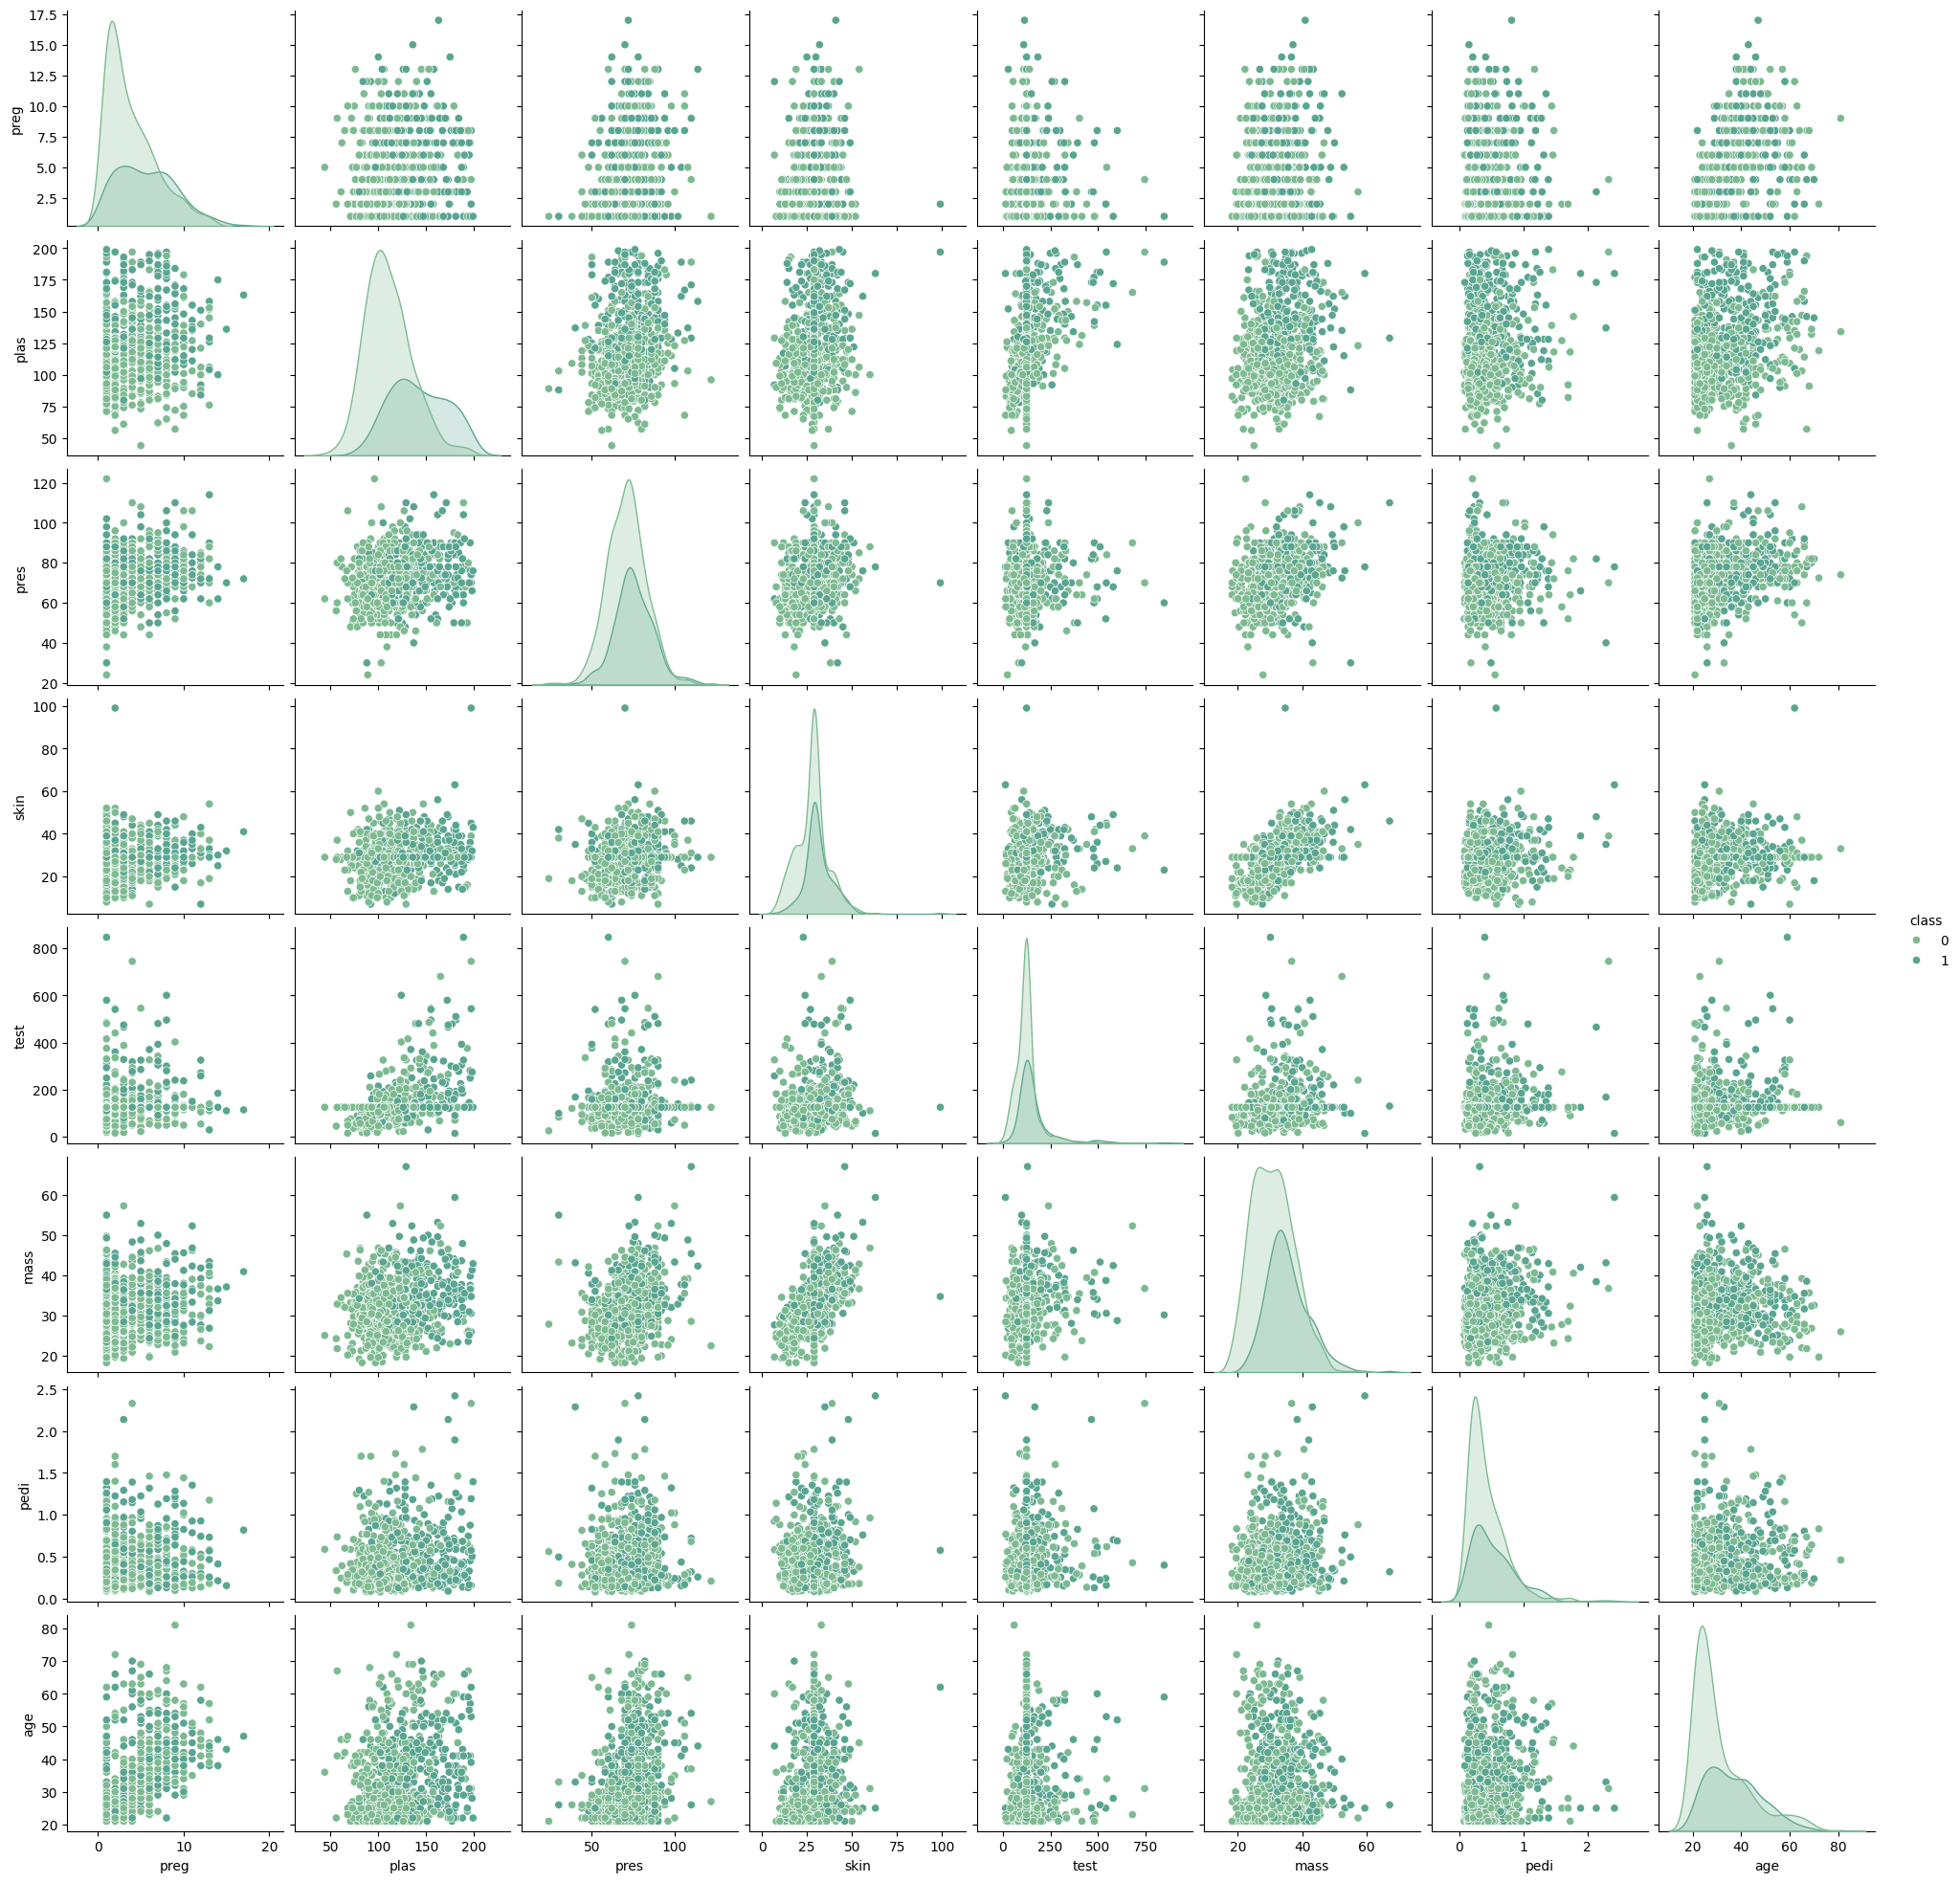

In [ ]:
# Define the color palette for categorical hue
# Since pairplot uses colors for different categories, generate a palette with discrete colors
palette = sns.color_palette("crest", as_cmap=False)  # Create a discrete color palette

# Create the scatter plot matrix
# Adjust the figure size
plt.figure(figsize=(20, 20))

# Create the scatter plot matrix with the BuGn color palette
pairplot = sns.pairplot(diabetes, hue='class', palette=palette)

# Display the plot
plt.show()

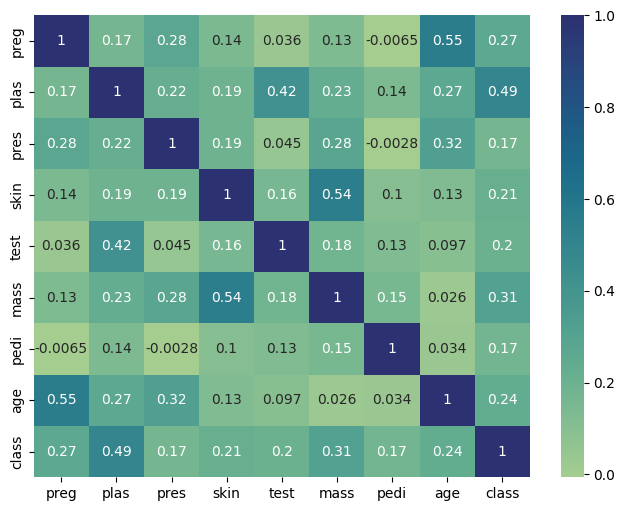

In [ ]:
plt.figure(figsize=(8,6))
# on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='crest')
# seaborn has very simple solution for heatmap

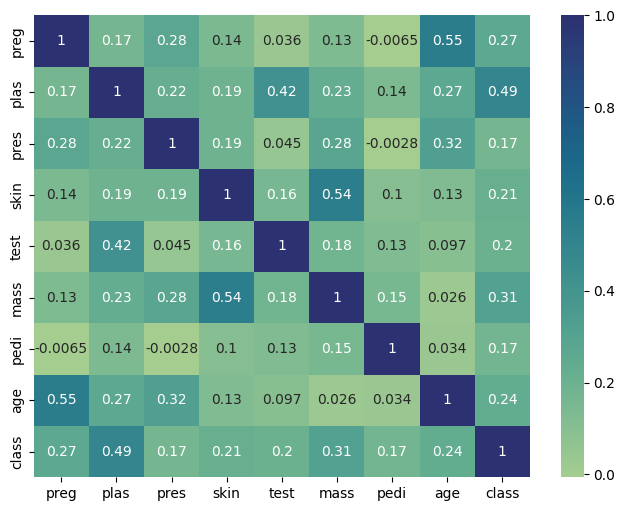

In [ ]:
plt.figure(figsize=(8,6))
# on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='crest')
# seaborn has very simple solution for heatmap

In [ ]:
# Check for duplicate rows
duplicate_rows = diabetes[diabetes.duplicated()]

# Display the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows (optional)
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [preg, plas, pres, skin, test, mass, pedi, age, class]
Index: []


In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes.drop(["class"],axis = 1),),
        columns=['preg', 'plas', 'pres', 'skin', 'test',
       'mass', 'pedi', 'age'])

In [ ]:
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.468243,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-1.087043,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.090358,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-1.087043,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,NaN,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


# **Step 4: Data Analysis**

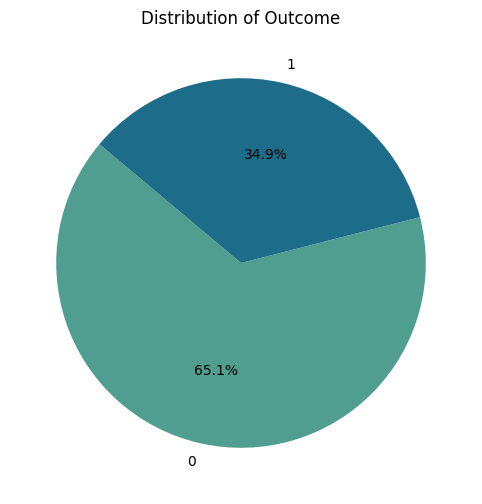

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data loading
# diabetes_dataset = pd.read_csv('path_to_your_dataset.csv')

# Calculate the value counts of the 'Outcome' column
outcome_counts = diabetes['class'].value_counts()

# Define the color palette
palette = sns.color_palette("crest", len(outcome_counts))

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, colors=palette, autopct='%1.1f%%', startangle=140)

# Title of the plot
plt.title('Distribution of Outcome')

# Display the plot
plt.show()